#### Customer Segmentation using mall data

### Importing necessary libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

### Loading the data file

In [157]:
df=pd.read_csv("mallCustomers.csv")
df.head() # first 5 records

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [158]:
df.tail() # last 5 records

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Analysing the data

In [159]:
df.shape #rows & columns count

(200, 5)

In [160]:
df.info() #datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [161]:
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

In [162]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [163]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [164]:
df.isnull().sum() #finding the missing data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Visualising the data

In [172]:
# fig1=sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

In [150]:
# %matplotlib notebook
# fig1 = plt.figure()
# ax = fig1.add_subplot(111, projection='3d')
# ax.scatter(df['Annual Income (k$)'], df['Age'], df['Spending Score (1-100)'])
# ax.set_xlabel('income')
# ax.set_ylabel('age')
# ax.set_zlabel('spending score')
# plt.show()

In [175]:
# dia=pd.plotting.scatter_matrix(df,figsize=(10,8))

# Implementing machine learning algorithms (unsupervised) for customer segmentation

In [219]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## K-means 

In [200]:
# since the number of cluster is not known, predicting with 2 clusters for now

<IPython.core.display.Javascript object>


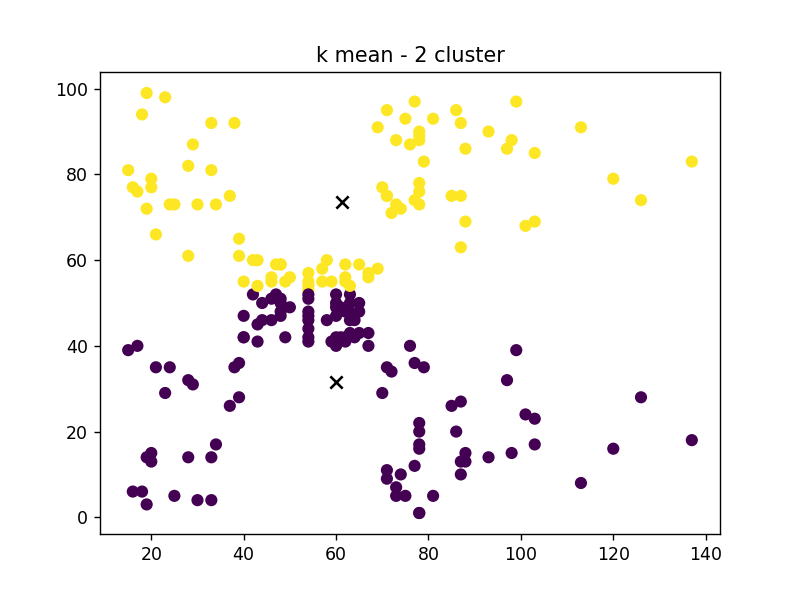

In [189]:
dfValues=df.iloc[:,3:5].values
kmeans = KMeans(n_clusters=2)
pred=kmeans.fit_predict(dfValues)
plt.scatter(dfValues[:, 0], dfValues[:, 1], c=pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, marker="x")
plt.title('k mean - 2 cluster')
plt.show()

## Evaluating number of cluster

### Elbow method

<IPython.core.display.Javascript object>


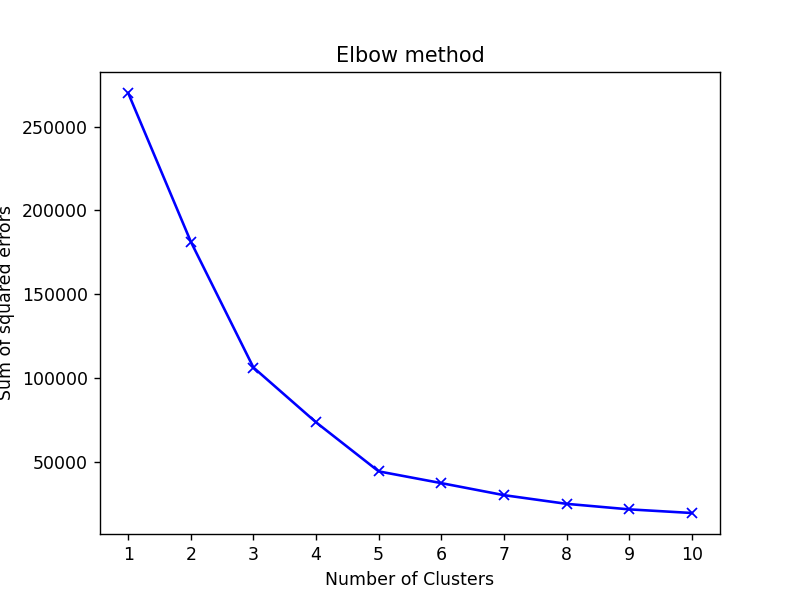

In [211]:
inertia_ = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dfValues)
    inertia_.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_, '-bx')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

_note: The optimal number of cluster is the point where intertia start decreasing in linear fashion.\
 In this case, the optimum number of cluster = 5.


### Recalculating K-means using 5 cluster points

<IPython.core.display.Javascript object>


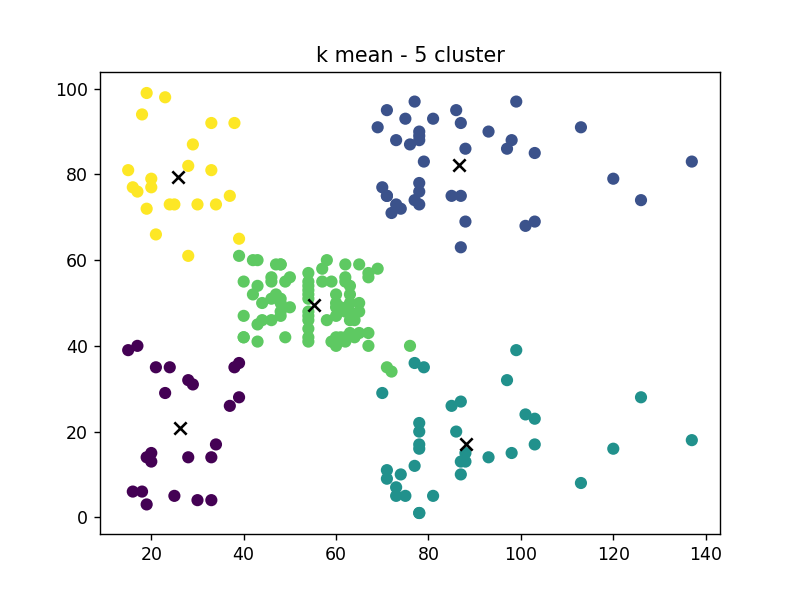

In [204]:
kmeans = KMeans(n_clusters=5)
pred=kmeans.fit_predict(dfValues)
plt.scatter(dfValues[:, 0], dfValues[:, 1], c=pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, marker="x")
plt.title('k mean - 5 cluster')
plt.show()

### Silhouette method

<IPython.core.display.Javascript object>


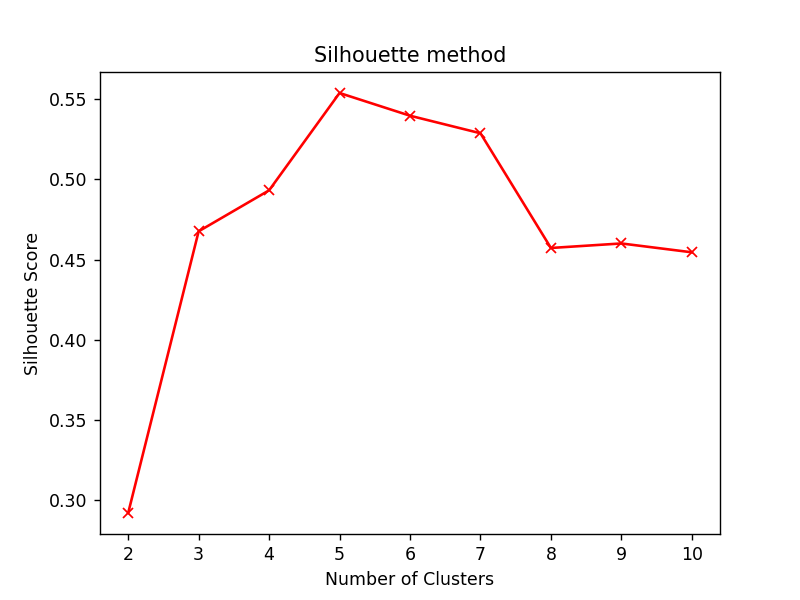

In [213]:
silhouette_scores = []
for num_of_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=num_of_cluster)
    pred = kmeans.fit_predict(dfValues)
    score = silhouette_score(dfValues, pred)
    silhouette_scores.append(score)
plt.plot(range(2,11), silhouette_scores, '-bx', color='red')
plt.title('Silhouette method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

_note: The optimal number of cluster is the point where number of cluster is maximum. <br>
Here it is 5, which is same as elbow method

## Hierarchical Algorithm

<IPython.core.display.Javascript object>


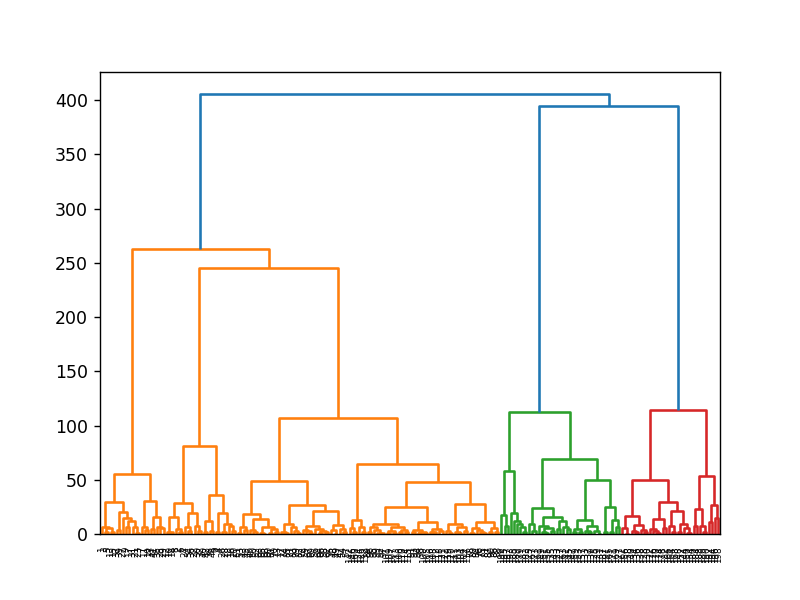

In [215]:
linkage_data = linkage(dfValues, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

<IPython.core.display.Javascript object>


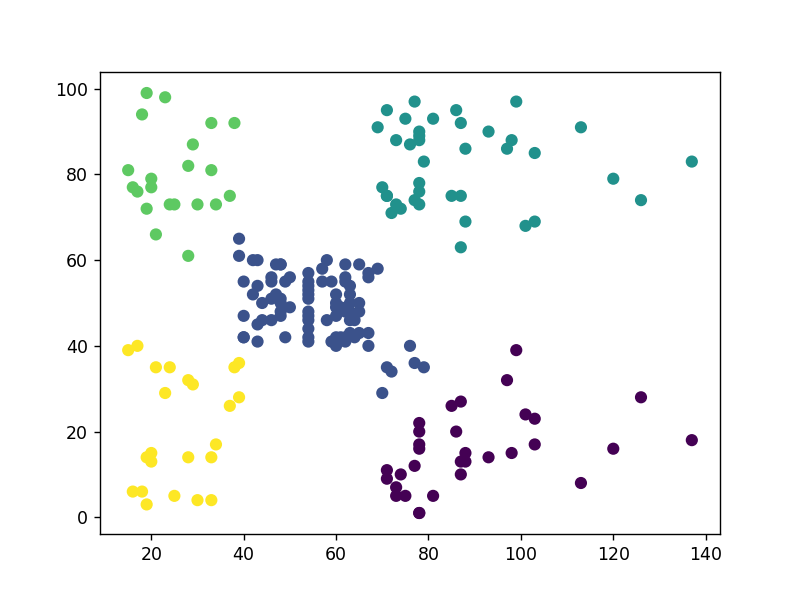

In [222]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pred = hierarchical_cluster.fit_predict(dfValues)
plt.scatter(dfValues[:, 0], dfValues[:, 1], c=pred)
plt.show()